In [1]:
from lionagi.core.message import System, Instruction
from lionagi.core.executor.graph_executor import GraphExecutor
from lionagi.core.engine.instruction_map_engine import InstructionMapEngine
from lionagi.core.agent.base_agent import BaseAgent

In [2]:
# let us use a simple calculator as an example
# in this example, we will have two sets of instructions with different step 1 but same step 2.
# given two numbers, the first step would be calculating both sum and diff in parallel
# and second step would be choosing between times or plus based on the sign of the first step

system = System(
    "You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text."
)

instruct1 = Instruction(
    instruction={
        "sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|",
    }
)

instruct2 = Instruction(
    instruction={
        "diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|",
    }
)

instruct3 = Instruction(
    instruction={
        "if previous response is positive": "times 2. i.e. *2",
        "else": "plus 2. i.e. +2",
    }
)

In [3]:
graph_multi = GraphExecutor()
graph_multi.add_node(system)
graph_multi.add_node(instruct1)
graph_multi.add_node(instruct2)
graph_multi.add_node(instruct3)

graph_multi.add_edge(system, instruct1)
graph_multi.add_edge(system, instruct2)
graph_multi.add_edge(instruct1, instruct3)
graph_multi.add_edge(instruct2, instruct3)

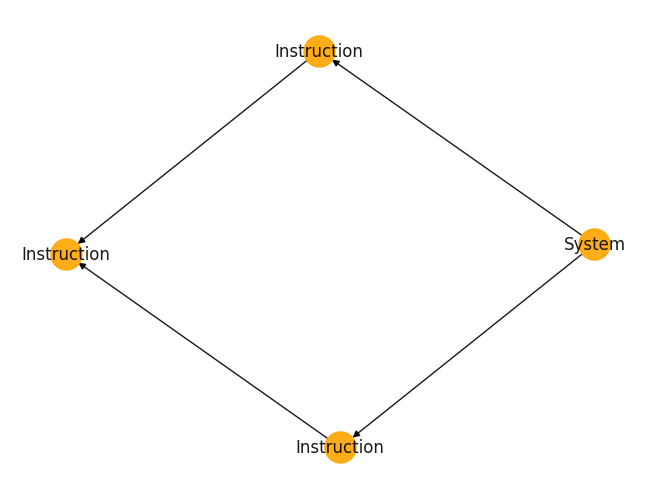

In [4]:
graph_multi.display()

In [5]:
## output_parser parameter: agent self
## output_parser return: the expected result that should be returned after execution
def output_parser(agent):
    ## return all message dataframe in all branches
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.to_df())
    return output


executable = InstructionMapEngine()

In [6]:
calculator = BaseAgent(
    structure=graph_multi, executable=executable, output_parser=output_parser
)

In [7]:
result = await calculator.execute(context={"x": 2, "y": 3})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

user: {"diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|"}

assistant 83c099e7d3f699f877a23bb6cc0d6179: 1

-----------------------------------------------------


assistant cd52d1244f8a3f5b8afec6b8a5e94b7d: 5

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant 83c099e7d3f699f877a23bb6cc0d6179: 2

-----------------------------------------------------


assistant cd52d1244f8a3f5b8afec6b8a5e94b7d: 10

-----------------------------------------------------


In [8]:
result[0]

,ln_id,message_type,timestamp,role,content,metadata,sender,recipient
0,37efe94b2948578223c3e2b85c14c6b6,System,2024-07-03T18:35:48.316392,system,{'system_info': 'You are asked to perform as a...,{'last_updated': {'recipient': '2024-07-03T18:...,system,cd52d1244f8a3f5b8afec6b8a5e94b7d
1,ba2723b41691c2cdbe41de65953560a5,Instruction,2024-07-03T18:35:49.458698,user,{'instruction': {'sum the absolute values': 'p...,{'last_updated': {'sender': '2024-07-03T18:35:...,user,cd52d1244f8a3f5b8afec6b8a5e94b7d
2,6061c750265361145b6a8abaca8c8286,AssistantResponse,2024-07-03T18:35:50.401902,assistant,{'assistant_response': '5'},{'last_updated': {'sender': '2024-07-03T18:35:...,cd52d1244f8a3f5b8afec6b8a5e94b7d,user
3,7280004cb6aea0cb6a64766df8ee8c4d,Instruction,2024-07-03T18:35:50.811427,user,{'instruction': {'if previous response is posi...,{'last_updated': {'sender': '2024-07-03T18:35:...,user,cd52d1244f8a3f5b8afec6b8a5e94b7d
4,a064ff4b3e8fc0f1f220a8700f08f2e0,AssistantResponse,2024-07-03T18:35:51.594600,assistant,{'assistant_response': '10'},{'last_updated': {'sender': '2024-07-03T18:35:...,cd52d1244f8a3f5b8afec6b8a5e94b7d,user


In [9]:
result[1]

,ln_id,message_type,timestamp,role,content,metadata,sender,recipient
0,1689a1ea119c388909467fae59e6a0e3,System,2024-07-03T18:35:49.454638,system,{'system_info': 'You are asked to perform as a...,{'origin_ln_id': '37efe94b2948578223c3e2b85c14...,cd52d1244f8a3f5b8afec6b8a5e94b7d,83c099e7d3f699f877a23bb6cc0d6179
1,9033072f4678258061dd487db669ff18,Instruction,2024-07-03T18:35:49.663423,user,{'instruction': {'diff the absolute values': '...,{'last_updated': {'sender': '2024-07-03T18:35:...,user,83c099e7d3f699f877a23bb6cc0d6179
2,5091c9da9acf133d0654d3c461f0e285,AssistantResponse,2024-07-03T18:35:50.097099,assistant,{'assistant_response': '1'},{'last_updated': {'sender': '2024-07-03T18:35:...,83c099e7d3f699f877a23bb6cc0d6179,user
3,712c0fbf38ac72ef29ba34b2cde72fbe,Instruction,2024-07-03T18:35:50.812204,user,{'instruction': {'if previous response is posi...,{'last_updated': {'sender': '2024-07-03T18:35:...,user,83c099e7d3f699f877a23bb6cc0d6179
4,fe5e34756e7c67e344f8f3ccbdb2350a,AssistantResponse,2024-07-03T18:35:51.429557,assistant,{'assistant_response': '2'},{'last_updated': {'sender': '2024-07-03T18:35:...,83c099e7d3f699f877a23bb6cc0d6179,user


# Storing Structures

We currently support the storage of structures in Excel and Neo4j, enabling their reuse in future applications.

### Excel

In [10]:
graph_multi.to_excel("math_multi")  # dir = "structure_storage" (default)

### Neo4j

In [11]:
# initiate Neo4j Driver
uri = "bolt://localhost:7687"
user = "neo4j"
password = "12345678"
database = "neo4j"

from lionagi.integrations.storage.neo4j import Neo4j

neo4j = Neo4j(uri, user, password, database)

In [12]:
# structure_name is unique

await neo4j.store(graph_multi, structure_name="math_multi")